In [13]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [97]:
tensor1 = np.load("../2015-5appliances-true-agg.npy")
tensor2 = np.load("../2015-5appliances.numpy.npy")
tensor3 = np.load("../2015-5appliances-subtract-true-agg.npy")
tensor4 = np.load("../2015-5appliances-sum-true-agg.npy")

In [98]:
APPLIANCES=['aggregate', 'hvac', 'fridge', 'dr', 'dw', 'mw']

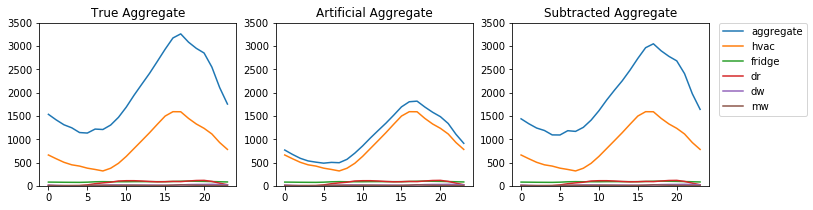

In [134]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 3))
ax = axes.flatten()

pd.DataFrame(tensor1.mean(axis=0).mean(axis=1), index=APPLIANCES).T.plot(ax=ax[0], legend=False, title='True Aggregate')
ax[0].set_ylim(0, 3500)

pd.DataFrame(tensor2.mean(axis=0).mean(axis=1), index=APPLIANCES).T.plot(ax=ax[1], legend=False, title='Artificial Aggregate')
ax[1].set_ylim(0, 3500)

pd.DataFrame(tensor3.mean(axis=0).mean(axis=1), index=APPLIANCES).T.plot(ax=ax[2], legend=False, title='Subtracted Aggregate')
ax[2].set_ylim(0, 3500)

# pd.DataFrame(tensor4.mean(axis=0).mean(axis=1), index=APPLIANCES).T.plot(ax=ax[3], title='Sum up Additional Appliance')
# ax[3].set_ylim(0, 3500)
ax[2].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [34]:
# calculate the residual for tensor1 and tensor3
residual1 = tensor1[:, 0, :, :] - tensor2[:, 0, :, :]
residual3 = tensor3[:, 0, :, :] - tensor2[:, 0, :, :]

In [44]:
r1_series = pd.Series(residual1.mean(axis=1).mean(axis=1))

In [43]:
r3_series = pd.Series(residual3.mean(axis=1).mean(axis=1))

In [49]:
r3_high_index = r3_series[r3_series > 1000].index

In [51]:
dataid = np.load("./homeid_10_hourly.npy")
validid = np.load("./valid_homes_index.npy")

In [54]:
valid_dataid = dataid[validid]

In [56]:
r3_high_homeid = valid_dataid[r3_high_index]
r3_high_homeid

array([ 661, 2018, 7940, 2094, 9737, 7863, 3367, 4373, 4526, 8156, 7117,
       9248, 4957, 2242, 1507, 3916, 5809])

In [58]:
import os
st = pd.HDFStore(os.path.expanduser("../all.h5"), mode='r')

In [96]:
for id in r3_high_homeid:
    print(id)
    print(st[str(id)]['2015-05-09':'2015-09-30'].mean(axis=0))

661
use               2195.143066
air1              1035.678467
bathroom1            4.632654
car1               255.163864
clotheswasher1       5.166203
dishwasher1          3.931873
disposal1            0.007893
drye1               56.112537
furnace1           258.166473
kitchenapp1          0.743799
kitchenapp2          0.095239
microwave1           4.359661
refrigerator1       56.669075
dtype: float32
2018
use               3604.263672
air1              1168.959717
air2               571.553345
bathroom1           11.355437
bathroom2            0.208372
car1               249.016403
clotheswasher1       2.065383
dishwasher1         22.556255
disposal1            0.219588
drye1               35.518902
furnace1           354.525024
furnace2           180.421143
jacuzzi1             0.000000
kitchenapp1         10.787691
kitchenapp2         35.845127
lights_plugs1       92.509338
microwave1           8.334795
oven1                9.463082
range1              26.916433
refrigerator1   

# cluster change with new dataset

In [101]:
labels = [1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2,
       0, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 2,
       2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1]
cluster = {}
for i in range(3):
    cluster[i] = [x for x in range(68) if labels[x] == i]

Text(0.5,1,'Subtracted Aggregate')

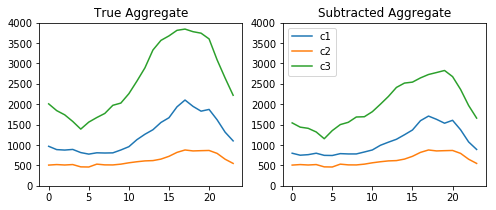

In [133]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
ax = axes.flatten()

pd.Series(residual1[cluster[0]].mean(axis=0).mean(axis=0)).plot(ax=ax[0])
pd.Series(residual1[cluster[1]].mean(axis=0).mean(axis=0)).plot(ax=ax[0])
pd.Series(residual1[cluster[2]].mean(axis=0).mean(axis=0)).plot(ax=ax[0])
ax[0].set_ylim(0, 4000)
ax[0].set_title("True Aggregate")

pd.Series(residual3[cluster[0]].mean(axis=0).mean(axis=0)).plot(ax=ax[1])
pd.Series(residual3[cluster[1]].mean(axis=0).mean(axis=0)).plot(ax=ax[1])
pd.Series(residual3[cluster[2]].mean(axis=0).mean(axis=0)).plot(ax=ax[1])
ax[1].legend(['c1', 'c2', 'c3'])
ax[1].set_ylim(0, 4000)
ax[1].set_title("Subtracted Aggregate")



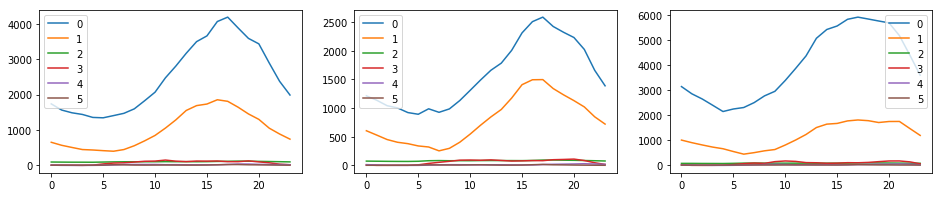

In [111]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 3))
ax = axes.flatten()

pd.DataFrame(tensor1[cluster[0]].mean(axis=0).mean(axis=1)).T.plot(ax=ax[0])
pd.DataFrame(tensor1[cluster[1]].mean(axis=0).mean(axis=1)).T.plot(ax=ax[1])
pd.DataFrame(tensor1[cluster[2]].mean(axis=0).mean(axis=1)).T.plot(ax=ax[2])